In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

# **Data:**

In [142]:
data= pd.read_csv("cosmetics.csv")

In [143]:
data

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


In [144]:
print("Combination skin",data['Combination'].isna().sum())
print("Dry skin",data['Dry'].isna().sum())
print("Normal skin",data['Normal'].isna().sum())
print("Oily skin",data['Oily'].isna().sum())
print("Sensitive skin",data['Sensitive'].isna().sum())


Combination skin 0
Dry skin 0
Normal skin 0
Oily skin 0
Sensitive skin 0


# **Data Preprocessing:**

In [145]:
# Filter for moisturizers 
moisturizers = data[data["Label"]=="Moisturizer"]
print("sum:",len(moisturizers.index))
moisturizers["All Skin Types"]=np.where((moisturizers.Combination==1)&(moisturizers.Dry==1)&(moisturizers.Normal==1)&(moisturizers.Oily==1)&(moisturizers.Sensitive==1), 1, 0)
display(moisturizers)

sum: 298


<ipython-input-145-99480dde01b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moisturizers["All Skin Types"]=np.where((moisturizers.Combination==1)&(moisturizers.Dry==1)&(moisturizers.Normal==1)&(moisturizers.Oily==1)&(moisturizers.Sensitive==1), 1, 0)


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,All Skin Types
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
293,Moisturizer,LA MER,The Moisturizing Matte Lotion,270,3.9,"Water, Algae (Seaweed) Extract, Propanediol, S...",0,0,1,1,0,0
294,Moisturizer,HERBIVORE,Jasmine Green Tea Balancing Toner,39,4.2,"Jasminum Officinale (Jasmine) Flower Water, Ha...",1,0,0,1,1,0
295,Moisturizer,CLARINS,Super Restorative Night Age Spot Correcting Re...,136,4.5,"Water, Cetearyl Isononanoate, Dimethicone, Gly...",0,0,0,0,0,0
296,Moisturizer,KATE SOMERVILLE,Goat Milk Moisturizing Cream,65,4.1,"Water, Ethylhexyl Palmitate, Myristyl Myristat...",1,1,1,1,1,1


In [146]:
moisturizers['Ingredients'].isna().sum()

0

In [147]:
moisturizers.drop(columns= ['Label','Brand','Price','Combination','Dry','Normal','Oily','Sensitive','Rank'])

,Name,Ingredients,All Skin Types
0,Crème de la Mer,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1
1,Facial Treatment Essence,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1
2,Protini™ Polypeptide Cream,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",0
3,The Moisturizing Soft Cream,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1
4,Your Skin But Better™ CC+™ Cream with SPF 50+,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1
...,...,...,...
293,The Moisturizing Matte Lotion,"Water, Algae (Seaweed) Extract, Propanediol, S...",0
294,Jasmine Green Tea Balancing Toner,"Jasminum Officinale (Jasmine) Flower Water, Ha...",0
295,Super Restorative Night Age Spot Correcting Re...,"Water, Cetearyl Isononanoate, Dimethicone, Gly...",0
296,Goat Milk Moisturizing Cream,"Water, Ethylhexyl Palmitate, Myristyl Myristat...",1


In [148]:
#Splitting ingredients:
ingredient_index = {} #unique ingredients index
product_ingredients = [] #ingredients
index = 0
count=0 

# For loop for tokenization
for i in range(len(moisturizers)):    
    ingredients = moisturizers['Ingredients'][i]
    ingredients_lower = ingredients.lower()
    tokens = ingredients_lower.split(', ')
    product_ingredients.append(tokens)
    for ingredient in tokens:
        if ingredient not in ingredient_index:
            ingredient_index[ingredient] = index
            index += 1

#print("pi:",product_ingredients)
#print("ii:", ingredient_index)
#print(product_ingredients)
#print(len(product_ingredients))


In [149]:
# Get the number of items and tokens 
M = len(moisturizers)
N = len(ingredient_index)

# Initialize a matrix of zeros
A = np.zeros([M,N])

# Define the one_hot_encoder function
def oh_encoder(tokens):
    x = np.zeros(N)
    for ingredient in tokens:
        # Get the index for each ingredient
        idx = ingredient_index[ingredient]
        # Put 1 at the corresponding indices
        y=1
        x[idx] = 1
        x[idx].astype(int)
    return x

In [150]:
# Make a document-term matrix
i = 0
for tokens in product_ingredients:
    A[i, :] = oh_encoder(tokens)
    i+=1
print(A)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [151]:
one_hot=pd.DataFrame(A)
one_hot.columns=ingredient_index
one_hot.index= moisturizers['Name']

In [152]:
one_hot.columns

Index(['algae (seaweed) extract', 'mineral oil', 'petrolatum', 'glycerin',
       'isohexadecane', 'microcrystalline wax', 'lanolin alcohol',
       'citrus aurantifolia (lime) extract',
       'sesamum indicum (sesame) seed oil',
       'eucalyptus globulus (eucalyptus) leaf oil',
       ...
       'brazil nut oil', 'evening primrose oil', 'buriti oil', 'arnica oil',
       'rosehip oil', 'calendula oil', 'kiwi fruit seed oil', 'totarol',
       'rosemary leaf extract',
       'natural fragrance (orange blossom & rose gardenia.)'],
      dtype='object', length=2920)

In [153]:
col_Sum= one_hot.sum(axis='rows')
col_Sum

algae (seaweed) extract                                  9.0
mineral oil                                              4.0
petrolatum                                              12.0
glycerin                                               171.0
isohexadecane                                           20.0
                                                       ...  
calendula oil                                            1.0
kiwi fruit seed oil                                      1.0
totarol                                                  1.0
rosemary leaf extract                                    1.0
natural fragrance (orange blossom & rose gardenia.)      1.0
Length: 2920, dtype: float64

In [154]:
df=pd.DataFrame(col_Sum)

In [155]:
one_hot.head()

,algae (seaweed) extract,mineral oil,petrolatum,glycerin,isohexadecane,microcrystalline wax,lanolin alcohol,citrus aurantifolia (lime) extract,sesamum indicum (sesame) seed oil,eucalyptus globulus (eucalyptus) leaf oil,...,brazil nut oil,evening primrose oil,buriti oil,arnica oil,rosehip oil,calendula oil,kiwi fruit seed oil,totarol,rosemary leaf extract,natural fragrance (orange blossom & rose gardenia.)
Name,,,,,,,,,,,,,,,,,,,,,
Crème de la Mer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Facial Treatment Essence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Protini™ Polypeptide Cream,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Moisturizing Soft Cream,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Your Skin But Better™ CC+™ Cream with SPF 50+,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
one_hot["All Skin Types"]= 0

for index, row in moisturizers.iterrows():
  for indexh, rowh in one_hot.iterrows():
    if row["Name"]== indexh:
      one_hot.at[indexh,"All Skin Types"]= row["All Skin Types"]


for i in one_hot.columns:
  if sum(one_hot[i])<20:
    one_hot.drop(i, axis=1, inplace=True)

one_hot

,glycerin,isohexadecane,water,citric acid,panthenol,limonene,geraniol,linalool,citronellol,citral,...,behenyl alcohol,tromethamine,dipropylene glycol,hydrogenated lecithin,peg-100 stearate,glycyrrhiza glabra (licorice) root extract,ammonium acryloyldimethyltaurate/vp copolymer,hexylene glycol,silica,All Skin Types
Name,,,,,,,,,,,,,,,,,,,,,
Crème de la Mer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Facial Treatment Essence,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Protini™ Polypeptide Cream,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
The Moisturizing Soft Cream,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Your Skin But Better™ CC+™ Cream with SPF 50+,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Moisturizing Matte Lotion,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
Jasmine Green Tea Balancing Toner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Super Restorative Night Age Spot Correcting Replenishing Cream,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [157]:
one_hot["sumR"]= one_hot.sum(axis='columns')
one_hot= one_hot.loc[one_hot["sumR"]!=0]
one_hot

,glycerin,isohexadecane,water,citric acid,panthenol,limonene,geraniol,linalool,citronellol,citral,...,tromethamine,dipropylene glycol,hydrogenated lecithin,peg-100 stearate,glycyrrhiza glabra (licorice) root extract,ammonium acryloyldimethyltaurate/vp copolymer,hexylene glycol,silica,All Skin Types,sumR
Name,,,,,,,,,,,,,,,,,,,,,
Crème de la Mer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,13.0
Facial Treatment Essence,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
Protini™ Polypeptide Cream,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0
The Moisturizing Soft Cream,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,27.0
Your Skin But Better™ CC+™ Cream with SPF 50+,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Featherweight Daily Moisturizing Cream,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1,22.0
The Moisturizing Matte Lotion,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,26.0
Super Restorative Night Age Spot Correcting Replenishing Cream,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,19.0


In [158]:
one_hot.drop("sumR", axis=1, inplace=True)
one_hot

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,glycerin,isohexadecane,water,citric acid,panthenol,limonene,geraniol,linalool,citronellol,citral,...,behenyl alcohol,tromethamine,dipropylene glycol,hydrogenated lecithin,peg-100 stearate,glycyrrhiza glabra (licorice) root extract,ammonium acryloyldimethyltaurate/vp copolymer,hexylene glycol,silica,All Skin Types
Name,,,,,,,,,,,,,,,,,,,,,
Crème de la Mer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Facial Treatment Essence,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Protini™ Polypeptide Cream,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
The Moisturizing Soft Cream,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Your Skin But Better™ CC+™ Cream with SPF 50+,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Featherweight Daily Moisturizing Cream,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1
The Moisturizing Matte Lotion,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
Super Restorative Night Age Spot Correcting Replenishing Cream,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [159]:
print(sum(one_hot['All Skin Types']==1))
print(sum(one_hot['All Skin Types']==0))

127
121


# **Models:**

In [160]:
features = one_hot.copy().drop("All Skin Types", axis = 1)
sType = one_hot["All Skin Types"]
sType=sType.to_frame()
X_train, X_test, y_train, y_test = train_test_split(features, sType, test_size=0.25, random_state=1, shuffle=True)

In [161]:
from sklearn.preprocessing import RobustScaler

#scaler = RobustScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#print(X_test)

In [162]:
from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#X_train, y_train = sm.fit_resample(X_train, y_train)
#print(y_train)

In [163]:
type(sType)

pandas.core.frame.DataFrame

In [164]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=3)


In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

precision, recall, probability = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-165-242197886b82>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models[key].fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

In [166]:
df_model = pd.DataFrame(index=models.keys(), columns=['Precision', 'Recall'])
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Precision,Recall
Logistic Regression,0.722222,0.666667
Support Vector Machines,0.722222,0.634146
Decision Trees,0.583333,0.656250
Random Forest,0.472222,0.708333
Naive Bayes,0.555556,0.769231
K-Nearest Neighbor,0.694444,0.757576


In [167]:
def evaluation(x,y, model):
  y_hat = model.predict(x) 
  accuracy = accuracy_score(y, y_hat)
  print(f"Accuracy: {accuracy}")
  return accuracy, y_hat

trainAcc, testAcc, prob= {}, {}, {}
for key in models.keys():
    trainA, trainPre= evaluation(X_train, y_train, models[key])
    trainAcc[key]= trainA
    testA, testPre= evaluation(X_test, y_test, models[key])
    testAcc[key]= testA



#index=['Logistic Regression', 'Decision Trees', 'Random Forest', 'Naive Bayes', 'KNN']
#df_accuracy = pd.DataFrame(index=models.index)
df_model["Train Accuracy"]= trainAcc.values()
df_model["Test Accuracy"]= testAcc.values()
df_model


Accuracy: 0.8064516129032258
Accuracy: 0.6290322580645161
Accuracy: 0.8172043010752689
Accuracy: 0.5967741935483871
Accuracy: 0.978494623655914
Accuracy: 0.5806451612903226
Accuracy: 0.978494623655914
Accuracy: 0.5806451612903226
Accuracy: 0.6720430107526881
Accuracy: 0.6451612903225806
Accuracy: 0.7580645161290323
Accuracy: 0.6935483870967742


,Precision,Recall,Train Accuracy,Test Accuracy
Logistic Regression,0.722222,0.666667,0.806452,0.629032
Support Vector Machines,0.722222,0.634146,0.817204,0.596774
Decision Trees,0.583333,0.656250,0.978495,0.580645
Random Forest,0.472222,0.708333,0.978495,0.580645
Naive Bayes,0.555556,0.769231,0.672043,0.645161
K-Nearest Neighbor,0.694444,0.757576,0.758065,0.693548


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

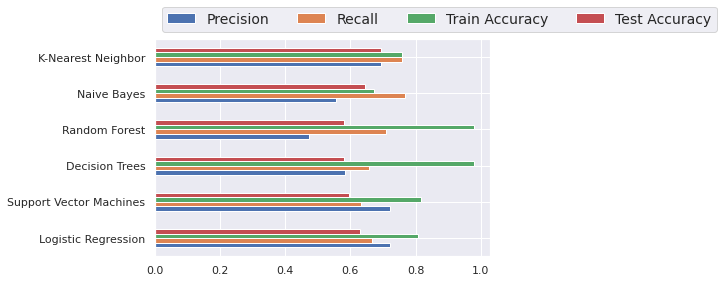

In [168]:
import matplotlib.pyplot as plt

ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt
#.tight_layout()

In [169]:
from sklearn.metrics import roc_curve, roc_auc_score
for key in models.keys():
  print("\n",models[key],":\n")
  models[key].fit(X_train, y_train)
  y_pred= models[key].predict(X_test)
  cm = metrics.confusion_matrix(y_test, y_pred)
  Results=metrics.classification_report(y_test, y_pred)
  print(metrics.classification_report(y_test, y_pred))
  print("",metrics.confusion_matrix(y_test, y_pred))
  #fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
  if key!= 'Support Vector Machines':
    y_pred_proba = models[key].predict_proba(np.array(X_test))[:,1]
    auc = np.round(roc_auc_score(y_test, y_pred_proba), 2)
    print("AUC: ", auc)
  print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted')  )
  print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))


 LogisticRegression() :

              precision    recall  f1-score   support

           0       0.57      0.50      0.53        26
           1       0.67      0.72      0.69        36

    accuracy                           0.63        62
   macro avg       0.62      0.61      0.61        62
weighted avg       0.62      0.63      0.63        62

 [[13 13]
 [10 26]]
AUC:  0.63
Precision: 0.6241234221598878
Recall: 0.6290322580645161

 LinearSVC() :

              precision    recall  f1-score   support

           0       0.52      0.42      0.47        26
           1       0.63      0.72      0.68        36

    accuracy                           0.60        62
   macro avg       0.58      0.57      0.57        62
weighted avg       0.59      0.60      0.59        62

 [[11 15]
 [10 26]]
Precision: 0.5878760630924281
Recall: 0.5967741935483871

 DecisionTreeClassifier() :

              precision    recall  f1-score   support

           0       0.44      0.54      0.48        26

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-169-9c9b767eacbe>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expect

              precision    recall  f1-score   support

           0       0.50      0.69      0.58        26
           1       0.69      0.50      0.58        36

    accuracy                           0.58        62
   macro avg       0.60      0.60      0.58        62
weighted avg       0.61      0.58      0.58        62

 [[18  8]
 [18 18]]
AUC:  0.66
Precision: 0.6116625310173697
Recall: 0.5806451612903226

 GaussianNB() :

              precision    recall  f1-score   support

           0       0.56      0.77      0.65        26
           1       0.77      0.56      0.65        36

    accuracy                           0.65        62
   macro avg       0.66      0.66      0.65        62
weighted avg       0.68      0.65      0.65        62

 [[20  6]
 [16 20]]
AUC:  0.75
Precision: 0.6796250344637441
Recall: 0.6451612903225806

 KNeighborsClassifier(n_neighbors=3) :

              precision    recall  f1-score   support

           0       0.62      0.69      0.65        26
  

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighbo

LogisticRegression() : 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


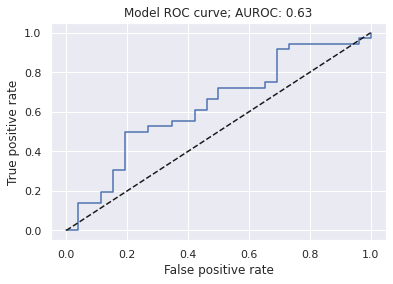

DecisionTreeClassifier() : 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


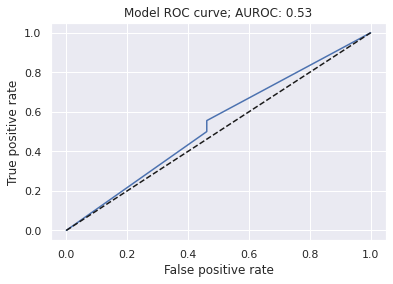

RandomForestClassifier() : 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


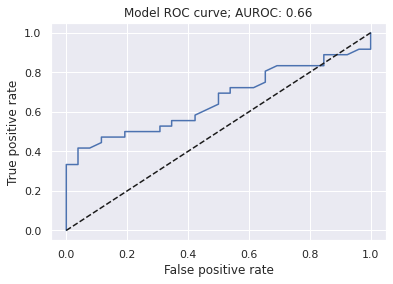

GaussianNB() : 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


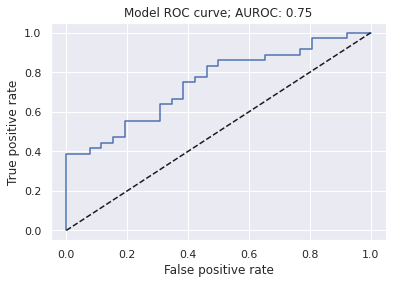

KNeighborsClassifier(n_neighbors=3) : 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


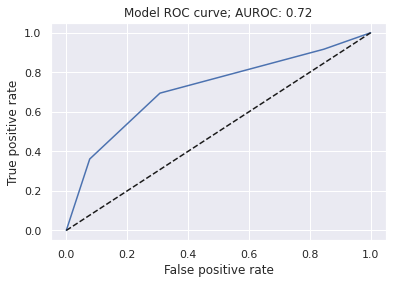

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

for key in models.keys():
  if key != 'Support Vector Machines':
    print(models[key],": ")
    y_pred_proba = models[key].predict_proba(np.array(X_test))[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    sns.set()

    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, linestyle = '--', color = 'k')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)
    plt.title(f'Model ROC curve; AUROC: {AUROC}');
    plt.show()

LogisticRegression()  : 

Confusion matrix

 [[13 13]
 [10 26]]

True Positives(TP) =  13

True Negatives(TN) =  26

False Positives(FP) =  13

False Negatives(FN) =  10


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


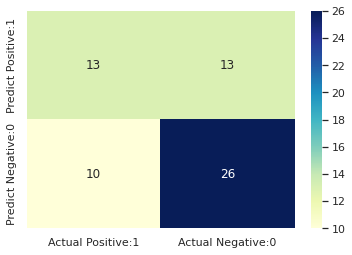

LinearSVC()  : 

Confusion matrix

 [[11 15]
 [10 26]]

True Positives(TP) =  11

True Negatives(TN) =  26

False Positives(FP) =  15

False Negatives(FN) =  10


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


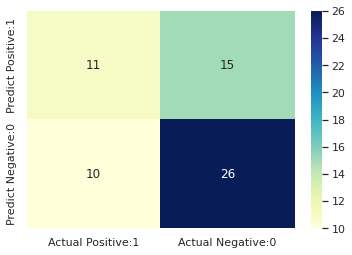

DecisionTreeClassifier()  : 

Confusion matrix

 [[12 14]
 [15 21]]

True Positives(TP) =  12

True Negatives(TN) =  21

False Positives(FP) =  14

False Negatives(FN) =  15


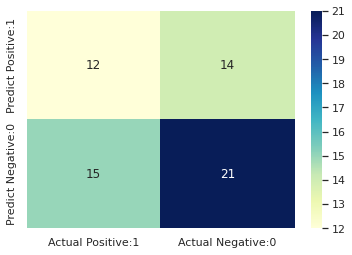

RandomForestClassifier()  : 

Confusion matrix

 [[19  7]
 [20 16]]

True Positives(TP) =  19

True Negatives(TN) =  16

False Positives(FP) =  7

False Negatives(FN) =  20


<ipython-input-171-f479460b0989>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models[key].fit(X_train, y_train)


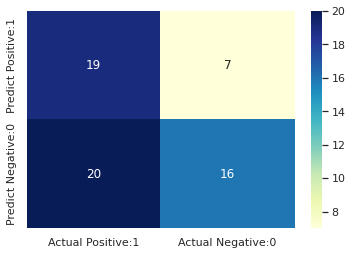

GaussianNB()  : 

Confusion matrix

 [[20  6]
 [16 20]]

True Positives(TP) =  20

True Negatives(TN) =  20

False Positives(FP) =  6

False Negatives(FN) =  16


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


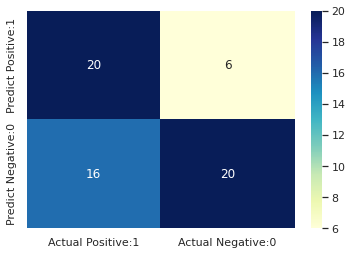

KNeighborsClassifier(n_neighbors=3)  : 

Confusion matrix

 [[18  8]
 [11 25]]

True Positives(TP) =  18

True Negatives(TN) =  25

False Positives(FP) =  8

False Negatives(FN) =  11


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


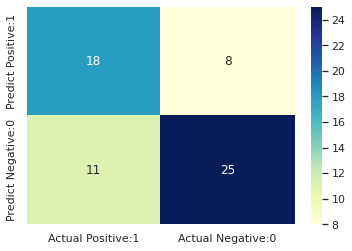

In [171]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

for key in models.keys():
  print(models[key]," : \n")
  models[key].fit(X_train, y_train)
  y_pred= models[key].predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  print('Confusion matrix\n\n', cm)
  print('\nTrue Positives(TP) = ', cm[0,0])
  print('\nTrue Negatives(TN) = ', cm[1,1])
  print('\nFalse Positives(FP) = ', cm[0,1])
  print('\nFalse Negatives(FN) = ', cm[1,0])
  # visualize confusion matrix with seaborn heatmap
  cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
  plt.show()